In [28]:
import numpy as np
import pandas as pd
import pickle 
import random
import matplotlib.pyplot as plt
import joblib
from datetime import date
import requests
import datetime
import time 
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
!pip install draftfast
import draftfast

     |████████████████████████████████| 13.9MB 240kB/s 
     |████████████████████████████████| 28.9MB 87kB/s 
  Created wheel for draftfast: filename=draftfast-3.3.4-cp36-none-any.whl size=55195 sha256=74148a8a3f0911bf68357ec24d6c64cdfc210849e078d82886659679cbf94f9b
  Stored in directory: /root/.cache/pip/wheels/01/c4/78/40109ccf1cee20fa52ddb5e1e085cd3a8093f61e82e1fe364f
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=b5ca08b792b2f3c08f9d5e9a54246c34a737c7c25108e9cdda270e8bbd44f93e
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built draftfast terminaltables
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.15.4 which is incompatible.
ERROR: tensorflow 2.4.0 has requirement numpy~=1.19.2, but you'll have numpy 1.15.4 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.15.4 which is inco

In [112]:
import keras
from keras.layers import Dense, Flatten, Reshape, Input
from keras.layers import  Dense, Lambda, dot, Activation, concatenate, LSTM, BatchNormalization, TimeDistributed
from keras.models import Sequential, Model
from keras.callbacks import History 
from keras.layers import Activation, Dropout, Flatten, Dense
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)


In [82]:
df_team = pd.read_csv("Team.csv")
del df_team['Unnamed: 0']
df_team['DATE'] = pd.to_datetime(df_team['DATE'])

X_features = df_team.columns.tolist()
vals_skip = ['TEAM', 'DATE']
X_features = [value for value in X_features if value not in vals_skip]

df_team_scaled = df_team[X_features]
scaler_X = MinMaxScaler()
scaler_X.fit(df_team_scaled[X_features])
df_team_scaled[X_features] = scaler_X.transform(df_team_scaled[X_features])

df_team_scaled['TEAM'] = df_team['TEAM']
df_team_scaled['DATE'] = df_team['DATE']
df_team_scaled = df_team_scaled[ ['TEAM','DATE'] + [ col for col in df_team_scaled.columns if col not in ['TEAM','DATE'] ] ]

df = pd.read_csv("Data.csv")
df['Date'] = pd.to_datetime(df['Date'])
del df['Unnamed: 0']


dd_list = []
for index, row in df.iterrows():
  try:
    mp = row['MP'].split(":")
    secs = (int(mp[0]) * 60) + int(mp[-1])
  except:
    secs = 0
  df.at[index, 'MP'] = secs
  stats = [row['PTS'], row['TRB'], row['BLK'],row['AST'],
            row['STL']]
  
  count = 0
  for stat in stats:
      if stat >= 10:
          count += 1
          
  if count == 2:
      dd_list.append(1.5)
  elif count > 2:
      dd_list.append(3)
  else:
      dd_list.append(0)

df['3P'] = .5 * df['3P']
df['ORB'] = 1.25 * df['ORB']
df['DRB'] = 1.25 * df['DRB']
df['TRB'] = 1.25 * df['TRB']
df['AST'] = 1.5 * df['AST']
df['STL'] = 2 * df['STL']
df['BLK'] = 2 * df['BLK']
df['TOV'] = -.5 * df['TOV']
df['DD_TD'] = dd_list
df['Score'] = df['3P'] + df['TRB'] + df['AST'] + df['STL'] + df['BLK'] + df['TOV'] + df['PTS'] + df['DD_TD']

from sklearn.preprocessing import MinMaxScaler

X_features = df.columns.tolist()
vals_skip = ['Player', 'Date','Team','OPP', 'Score']
X_features = [value for value in X_features if value not in vals_skip]

X_df = df[X_features]
scaler_X = MinMaxScaler()
scaler_X.fit(X_df[X_features])
X_df[X_features] = scaler_X.transform(X_df[X_features])



Y_features = ['Score']
Y_df = df[Y_features]

scaler_Y = MinMaxScaler()
scaler_Y.fit(Y_df[Y_features])
Y_df[Y_features] = scaler_Y.transform(Y_df[Y_features])

df_scaled = pd.merge(X_df, Y_df, left_index=True, right_index=True)
df_scaled = df_scaled[[ col for col in df_scaled.columns if col != 'Score' ] + ['Score'] ]
df_scaled['Player'] = df['Player']
df_scaled['Date'] = df['Date']
df_scaled = df_scaled[ ['Player','Date'] + [ col for col in df_scaled.columns if col not in ['Player','Date'] ] ]
df_scaled['Team'] = df['Team']
df_scaled['Opp'] = df['OPP']
df_scaled

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,Player,Date,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG,ORtg,DRtg,BPM,MP,Starter,DD_TD,Score,Team,Opp
0,Al Horford,2018-10-16,0.190476,0.170732,0.571,0.000000,0.041667,0.000,0.038462,0.037037,1.0,0.000000,0.173913,0.148148,0.083333,0.000,0.4,0.727273,0.166667,0.145161,0.581633,0.403333,0.380667,0.143,0.017875,0.000,0.131,0.063,0.917273,0.000,0.117845,0.287,0.143,0.300000,0.854545,0.660670,0.461006,1.0,0.0,0.253165,BOS,PHI
1,Kyrie Irving,2018-10-16,0.095238,0.341463,0.143,0.071429,0.333333,0.125,0.076923,0.074074,1.0,0.000000,0.173913,0.148148,0.291667,0.000,0.0,0.727273,0.166667,0.112903,0.581633,0.156667,0.119333,0.571,0.017875,0.000,0.135,0.065,0.936273,0.000,0.000000,0.168,0.253,0.210000,0.870909,0.653091,0.446383,1.0,0.0,0.232911,BOS,PHI
2,Jayson Tatum,2018-10-16,0.428571,0.414634,0.529,0.071429,0.208333,0.200,0.153846,0.185185,0.8,0.166667,0.304348,0.333333,0.125000,0.125,0.0,0.909091,0.333333,0.370968,0.551020,0.399333,0.372667,0.294,0.036750,0.063,0.237,0.146,0.925818,0.016,0.000000,0.050,0.286,0.416667,0.860000,0.666733,0.445357,1.0,0.0,0.427848,BOS,PHI
3,Jaylen Brown,2018-10-16,0.238095,0.317073,0.385,0.071429,0.125000,0.333,0.038462,0.074074,0.5,0.250000,0.086957,0.185185,0.083333,0.000,0.0,0.818182,0.666667,0.193548,0.602041,0.288000,0.282000,0.231,0.019250,0.096,0.069,0.083,0.918273,0.000,0.000000,0.126,0.229,0.303333,0.870909,0.656518,0.436891,1.0,0.0,0.225316,BOS,PHI
4,Gordon Hayward,2018-10-16,0.190476,0.292683,0.333,0.071429,0.125000,0.333,0.038462,0.074074,0.5,0.166667,0.130435,0.185185,0.000000,0.500,0.0,1.000000,0.166667,0.161290,0.591837,0.258667,0.250000,0.250,0.020875,0.074,0.119,0.096,0.909091,0.075,0.000000,0.000,0.214,0.300000,0.843636,0.662778,0.378912,1.0,0.0,0.265823,BOS,PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54180,Hassan Whiteside,2021-01-04,0.095238,0.121951,0.400,0.000000,0.000000,NaN,0.153846,0.185185,0.8,0.083333,0.043478,0.074074,0.000000,0.000,0.3,0.909091,0.000000,0.129032,0.397959,0.370667,0.266667,0.000,0.125000,0.073,0.093,0.082,0.909091,0.000,0.254770,0.122,0.276,0.353333,0.903636,0.659549,0.181119,0.0,0.0,0.177215,SAC,GSW
54181,Justin James,2021-01-04,0.095238,0.073171,0.667,0.000000,0.041667,0.000,0.000000,0.037037,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.0,1.000000,0.000000,0.064516,0.500000,0.387333,0.444667,0.333,0.041625,0.000,0.000,0.000,0.909091,0.000,0.000000,0.000,0.175,0.350000,0.947273,0.655068,0.119805,0.0,0.0,0.055696,SAC,GSW
54182,Chimezie Metu,2021-01-04,0.142857,0.097561,0.750,0.071429,0.041667,1.000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000,0.0,1.000000,0.000000,0.112903,0.510204,0.583333,0.583333,0.250,0.000000,0.000,0.000,0.000,0.909091,0.000,0.000000,0.000,0.334,0.523333,0.947273,0.673586,0.073114,0.0,0.0,0.091139,SAC,GSW
54183,Robert Woodard,2021-01-04,0.095238,0.146341,0.333,0.000000,0.041667,0.000,0.000000,0.000000,NaN,0.250000,0.130435,0.222222,0.000000,0.000,0.0,1.000000,0.000000,0.064516,0.510204,0.222000,0.222000,0.167,0.000000,0.541,0.689,0.606,0.909091,0.000,0.000000,0.000,0.500,0.303333,0.940000,0.655661,0.073114,0.0,0.0,0.131646,SAC,GSW


In [4]:
df_team_scaled

,TEAM,DATE,TEAM_PTS,TEAM_TRB,TEAM_AST,TEAM_BLK,TEAM_TOV,TEAM_FT,TEAM_ORTG,TEAM_DRTG,OPP_PTS,OPP_TRB,OPP_AST,OPP_BLK,OPP_TOV,OPP_FT,OPP_ORTG,OPP_DRTG
0,BOS,2018-10-16,0.37,0.673469,0.333333,0.25,0.44,0.190476,0.273695,0.239418,0.19,0.510204,0.242424,0.25,0.52,0.285714,0.129111,0.463328
1,BOS,2018-10-19,0.33,0.551020,0.575758,0.30,0.44,0.119048,0.413609,0.590092,0.45,0.551020,0.424242,0.15,0.36,0.285714,0.454471,0.454798
2,BOS,2018-10-20,0.35,0.510204,0.333333,0.10,0.48,0.619048,0.448763,0.457512,0.33,0.489796,0.393939,0.05,0.52,0.357143,0.412612,0.480210
3,BOS,2018-10-22,0.22,0.591837,0.333333,0.15,0.36,0.119048,0.203316,0.403796,0.25,0.551020,0.545455,0.10,0.24,0.119048,0.262118,0.350781
4,BOS,2018-10-25,0.33,0.469388,0.272727,0.05,0.32,0.523810,0.345039,0.385493,0.27,0.714286,0.272727,0.30,0.52,0.285714,0.441914,0.438805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,LAL,2020-12-27,0.59,0.489796,0.666667,0.70,0.56,0.285714,0.672951,0.268359,0.23,0.530612,0.424242,0.30,0.56,0.166667,0.377193,0.606040
5106,LAL,2020-12-28,0.39,0.387755,0.303030,0.25,0.44,0.309524,0.377331,0.578481,0.47,0.469388,0.515152,0.30,0.24,0.261905,0.648818,0.501239
5107,LAL,2020-12-30,0.53,0.510204,0.454545,0.15,0.56,0.309524,0.601726,0.522859,0.39,0.346939,0.454545,0.20,0.28,0.357143,0.295257,0.665024
5108,LAL,2021-01-01,0.41,0.734694,0.515152,0.35,0.40,0.261905,0.422180,0.444136,0.35,0.469388,0.393939,0.40,0.40,0.380952,0.322914,0.523748


In [5]:
def format(df_scaled):
  players = df_scaled['Player'].unique()
  lb = 5
  x_list = []
  y_list = []

  for player in (players):
    df_player = df_scaled[df_scaled['Player'] == player]
    df_player.reset_index(inplace = True, drop = True)


    if len(df_player) > 5:
      for i in range(0, len(df_player) - lb):

        data = df_player.iloc[i:i+5, :]
        y = df_player.iloc[i+5]['Score']

        del data['Score']
        data = data.values

        team = df_player.iloc[i+5]['Team']
        opp = df_player.iloc[i+5]['Opp']
        date = df_player.iloc[i+5]['Date']

        df_mid = df_team_scaled[df_team_scaled['DATE'] < date]
        df_team_vals = df_mid[df_mid['TEAM'] == team].tail(lb).values
        df_opp_vals = df_mid[df_mid['TEAM'] == opp].tail(lb).values

        if df_team_vals.shape[0]!= lb or df_opp_vals.shape[0] != lb:
          pass
        else:
          final_array = np.hstack((data[:,2:39],df_team_vals[:,2:],df_opp_vals[:,2:]))
          x_list.append(final_array)
          y_list.append(y)

  x = np.stack(x_list)
  y = np.asarray(y_list, dtype=np.float32)
  x = np.asarray(x).astype('float32')
  y = np.asarray(y).astype('float32')
  x[np.isnan(x)] = 0
  y[np.isnan(y)] = 0

  return x,y
  
split = int(len(df_scaled) * .9)
_tail = len(df_scaled) - split
x_train, y_train = format(df_scaled.head(split)) 
x_test, y_test = format(df_scaled.tail(_tail))

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((45565, 5, 69), (45565,), (3131, 5, 69), (3131,))

In [22]:
def attention_3d_block(hidden_states):

    hidden_size = int(hidden_states.shape[2])
    score_first_part = Dense(hidden_size, use_bias=False, name='attention_score_vec')(hidden_states)

    h_t = Lambda(lambda x: x[:, -1, :], output_shape=(hidden_size,), name='last_hidden_state')(hidden_states)
    score = dot([score_first_part, h_t], [2, 1], name='attention_score')
    attention_weights = Activation('softmax', name='attention_weight')(score)

    context_vector = dot([hidden_states, attention_weights], [1, 1], name='context_vector')
    pre_activation = concatenate([context_vector, h_t], name='attention_output')
    attention_vector = Dense(128, use_bias=False, activation='tanh', name='attention_vector')(pre_activation)

    return attention_vector

history = History()
model = Sequential()

inp = Input(x_train[0].shape)
x = (LSTM(8, return_sequences=True))(inp)
x = (Dropout(.05))(x)
x = (BatchNormalization())(x)
x = (LSTM(16, return_sequences=True))(x)
x = (Dropout(.05))(x)
x = (LSTM(8, return_sequences=True))(x)
x = (Dropout(.05))(x)
attention_output = (attention_3d_block(x))
out = (Dense(1, activation = 'relu'))(attention_output)

model = Model(inputs = inp, outputs = out)
model.compile(
  optimizer='adam',
  loss='mean_squared_error'
)

model.summary()

model.fit(x_train, y_train,
          batch_size=100,
          epochs=10,
          verbose=1,
          shuffle = True,
          validation_data=(x_test, y_test),
          callbacks=[history])

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 5, 69)]      0                                            
__________________________________________________________________________________________________
lstm_15 (LSTM)                  (None, 5, 8)         2496        input_6[0][0]                    
__________________________________________________________________________________________________
dropout_15 (Dropout)            (None, 5, 8)         0           lstm_15[0][0]                    
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 5, 8)         32          dropout_15[0][0]                 
____________________________________________________________________________________________

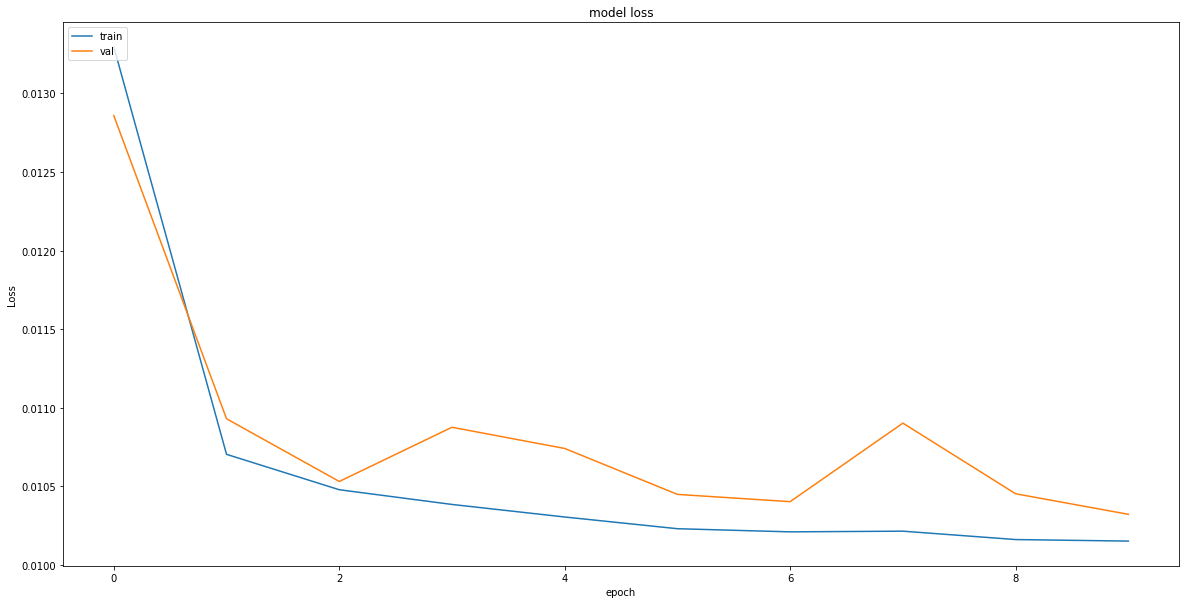

98/98 [==============================] - 0s 4ms/step - loss: 0.0103


0.010323221795260906

In [23]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot()

x = np.arange(0,len(history.history['loss']))

ax.plot(x,history.history['loss'])
ax.plot(x,history.history['val_loss'])


plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
model.evaluate(x_test, y_test)

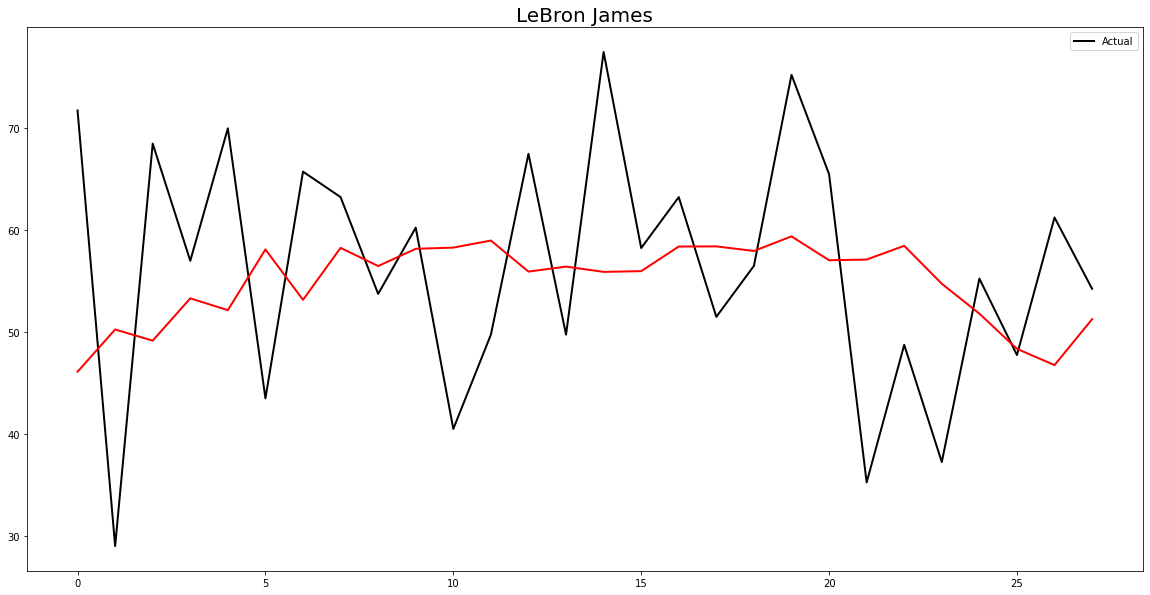

In [24]:
player = "LeBron James"
df_test = df_scaled.tail(_tail)
df_player = df_test[df_test['Player'] == player]
x_array, y_array = format(df_player)

actual = scaler_Y.inverse_transform((y_array.reshape(-1,1)))
x_array = np.asarray(x_array).astype('float32')
x_array[np.isnan(x_array)] = 0

_preds = model.predict(x_array)
preds = scaler_Y.inverse_transform(_preds)

fig = plt.figure(figsize=(20,10))
ax = plt.subplot()

co = 10
ax.plot(actual, label = 'Actual', color = 'black', linewidth = 2)
ax.plot(preds, color = 'red', linewidth = 2)
plt.title(player, fontsize = 20)
ax.legend()

In [92]:
def format_current(df_scaled, df_team_scaled, team, opp, date):
  players = df_scaled['Player'].unique()
  lb = 5
  x_list = []
  y_list = []

  for player in (players):
    df_player = df_scaled[df_scaled['Player'] == player]
    df_player.reset_index(inplace = True, drop = True)

    
    if len(df_player) > 5:
      
        data = df_player.tail(lb)
        del data['Score']
        data = data.values

        #team = df_player.iloc[i+5]['Team']
        #opp = df_player.iloc[i+5]['Opp']
        #date = df_player.iloc[i+5]['Date']

        df_mid = df_team_scaled[df_team_scaled['DATE'] < date]
        df_team_vals = df_mid[df_mid['TEAM'] == team].tail(lb).values
        df_opp_vals = df_mid[df_mid['TEAM'] == opp].tail(lb).values

        if df_team_vals.shape[0]!= lb or df_opp_vals.shape[0] != lb:
          return None
        else:
          final_array = np.hstack((data[:,2:39],df_team_vals[:,2:],df_opp_vals[:,2:]))
          x_list.append(final_array)

    else:
      return None
    
  x = np.asarray(x_list)
  x = np.asarray(x).astype('float32')
  x[np.isnan(x)] = 0
  return x

def prediciton_func(df_scaled, team, opp, date):
  
  lb=5
  url_team = "https://www.basketball-reference.com/teams/{}/2021.html".format(team)
  html_text = requests.get(url_team).text
  team_soup = bs(html_text)

  table = team_soup.find_all('table', id = 'roster')
  df_team = pd.read_html(str(table))[0]
  home_players = df_team['Player']
  home_players = list(home_players.values)

  df_mid = df_scaled[df_scaled['Player'].isin(home_players)]

  pred_list = []
  for player in home_players:
    df_mid_player = df_mid[df_mid['Player'] == player]
    x = format_current(df_mid_player, df_team_scaled, team, opp, date)
    if x is not None and x != []:
      prediction = model.predict(x)
      prediction = scaler_Y.inverse_transform(prediction)
      pred_list.append(prediction[0][0])
    else:
      pred_list.append(0)

  return home_players, pred_list

url = "https://www.basketball-reference.com/leagues/NBA_2021_games-january.html"
html_text = requests.get(url).text
games = bs(html_text)

table_rows = games.find_all('tr')
l = []
df_list = []
for tr in (table_rows[1:]):
    td = list(tr.find_all('td'))
    home = td[1].get("csk")
    away = td[3].get("csk")

    if home[4:12] == "20210105":
      home_team = home[0:3]
      away_team = away[0:3]
      
      home_players, home_preds = prediciton_func(df_scaled, home_team, away_team,'2020-01-05')
      away_players, away_preds = prediciton_func(df_scaled, away_team, home_team,'2020-01-05')
          
      df_mid = pd.DataFrame(home_players)
      df_mid['Preds'] = home_preds

      df_mid_away = pd.DataFrame(away_players)
      df_mid_away['Preds'] = away_preds

      df_concat = pd.concat([df_mid, df_mid_away])
      df_list.append(df_concat)
    
    else:
      pass

df_final = pd.concat(df_list)
df_final.columns = ['Player', 'Preds']
df_final

,Player,Preds
0,Mike Conley,34.631020
1,Donovan Mitchell,40.052071
2,Jordan Clarkson,25.157206
3,Rudy Gobert,40.855618
4,Bojan Bogdanović,23.781050
...,...,...
10,Harry Giles,16.279310
11,CJ Elleby,0.000000
12,Keljin Blevins (TW),0.000000
13,Nassir Little,6.754448


In [118]:
from draftfast import rules
from draftfast.optimize import run
from draftfast.csv_parse import salary_download
from draftfast.rules import DRAFT_KINGS
from draftfast.lineup_constraints import LineupConstraints
from draftfast.orm import Player
from draftfast.optimize import run_multi

dk = pd.read_csv("DKSalaries.csv")
dk = pd.concat([dk.set_index('Name'),df_final.set_index('Player')], axis=1, join='inner')
del dk['AvgPointsPerGame']
dk.index = dk.index.set_names(['Name'])
dk.reset_index(inplace = True)
dk.columns = [*dk.columns[:-1], 'AvgPointsPerGame']

dk.to_csv("DKSalaries_new.csv")

player_pool = salary_download.generate_players_from_csvs(
  salary_file_location='DKSalaries_new.csv',
  game=DRAFT_KINGS,
)

constraints=LineupConstraints(
    #locked=['Paul Millsap','Jeff Teague'],
    banned=['Ja Morant','Spencer Dinwiddie','Jarrett Culver','Justise Winslow','Derrick Favors',
            'Drew Eubanks','Shaquille Harrison','Trey Lyles','Kentavious Caldwell-Pope','Josh Okogie',
            'PJ Dozier','Ed Davis','Derrick White','Zach Collins']
    #groups=[
    #    [('Kemba Walker', 'Stephen Curry'), (1)],
    #]
)

roster = run_multi(
    iterations=1,
    rule_set=rules.DK_NBA_RULE_SET,
    player_pool=player_pool,
    constraints=constraints,
    verbose=True

  )
roster

Optimal roster for: NBA
+------------+------------------+------+-------------------------------+--------+--------------------+----------+--------+
| Position   | Player           | Team | Matchup                       | Salary |         Projection | vs. Avg. | Locked |
+------------+------------------+------+-------------------------------+--------+--------------------+----------+--------+
| PG/SG (PG) | Coby White       | CHI  | CHI@POR 01/05/2021 10:30PM ET |   6700 |   36.9379997253418 |     0.00 |        |
| SG         | Zach LaVine      | CHI  | CHI@POR 01/05/2021 10:30PM ET |   8000 |  49.42676544189453 |     0.00 |        |
| SG/SF (SG) | Dillon Brooks    | MEM  | LAL@MEM 01/05/2021 08:00PM ET |   6200 |  33.65031814575195 |     0.00 |        |
| SF/PF (SF) | Keldon Johnson   | SA   | SA@LAC 01/05/2021 10:00PM ET  |   6500 |    35.256591796875 |     0.00 |        |
| SF/PF (SF) | Patrick Williams | CHI  | CHI@POR 01/05/2021 10:30PM ET |   4200 |  20.84352684020996 |     0.00 |  

([+------------+------------------+------+-------------------------------+--------+--------------------+----------+--------+
  | Position   | Player           | Team | Matchup                       | Salary |         Projection | vs. Avg. | Locked |
  +------------+------------------+------+-------------------------------+--------+--------------------+----------+--------+
  | PG/SG (PG) | Coby White       | CHI  | CHI@POR 01/05/2021 10:30PM ET |   6700 |   36.9379997253418 |     0.00 |        |
  | SG         | Zach LaVine      | CHI  | CHI@POR 01/05/2021 10:30PM ET |   8000 |  49.42676544189453 |     0.00 |        |
  | SG/SF (SG) | Dillon Brooks    | MEM  | LAL@MEM 01/05/2021 08:00PM ET |   6200 |  33.65031814575195 |     0.00 |        |
  | SF/PF (SF) | Keldon Johnson   | SA   | SA@LAC 01/05/2021 10:00PM ET  |   6500 |    35.256591796875 |     0.00 |        |
  | SF/PF (SF) | Patrick Williams | CHI  | CHI@POR 01/05/2021 10:30PM ET |   4200 |  20.84352684020996 |     0.00 |        |


In [115]:
df_final[df_final['Player'] == 'Naz Reid']

,Player,Preds
3,Naz Reid,21.778854
